In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Grab and process the raw data.
data_path  = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
              "master/sentiment_labelled_sentences/amazon_cells_labelled.txt"
            )

reviews= pd.read_csv(data_path, delimiter= '\t',header=None)
reviews.columns = ['message', 'rating']
reviews.message.str.title()
print(reviews)

reviews


                                               message  rating
0    So there is no way for me to plug it in here i...       0
1                          Good case, Excellent value.       1
2                               Great for the jawbone.       1
3    Tied to charger for conversations lasting more...       0
4                                    The mic is great.       1
5    I have to jiggle the plug to get it to line up...       0
6    If you have several dozen or several hundred c...       0
7          If you are Razr owner...you must have this!       1
8                  Needless to say, I wasted my money.       0
9                     What a waste of money and time!.       0
10                     And the sound quality is great.       1
11   He was very impressed when going from the orig...       1
12   If the two were seperated by a mere 5+ ft I st...       0
13                            Very good quality though       1
14   The design is very odd, as the ear "clip" is n... 

,message,rating
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [3]:
#keywords = ['good',  'right','well','great', 'excellent','quality', 'like', 'fit']
keywords = ['good','works','worth', 'nice', 'love','loved','right','well',
            'great','quality', 'like', 'fit', 'fine','better', 
            'fast', 'buy', 'highly', 'beautiful', 'ok', 'glad', 
            'satisfied','favorite', 'need', 'happy', 'recommend','fun','again', 'but', 'impressed','easy',
            'simple', 'cool', 'no problems', 'more']



for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    reviews[str(key)] = reviews.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    



,rating,good,works,worth,nice,love,loved,right,well,great,...,recommend,fun,again,but,impressed,easy,simple,cool,no problems,more
rating,1.000000e+00,0.119296,0.178862,-0.018285,0.100504,0.127515,0.031639,-0.044901,0.090259,0.173537,...,0.078406,-0.031639,0.011994,-0.030619,0.022451,0.061797,0.031686,0.031686,0.031639,-0.026484
good,1.192962e-01,1.000000,-0.041034,-0.012585,0.069171,0.043881,-0.007258,-0.020602,0.072474,-0.042381,...,-0.035975,-0.007258,0.035772,-0.023415,-0.020602,-0.026329,0.058155,-0.014539,-0.007258,-0.026329
works,1.788624e-01,-0.041034,1.000000,-0.009811,0.040012,-0.022808,-0.005659,-0.016062,-0.024216,0.128453,...,0.009651,-0.005659,-0.015017,0.051821,-0.016062,-0.020527,-0.011335,-0.011335,0.176888,-0.020527
worth,-1.828487e-02,-0.012585,-0.009811,1.000000,-0.005513,-0.006995,-0.001736,-0.004926,0.130104,-0.010133,...,-0.008602,-0.001736,-0.004606,-0.011197,-0.004926,-0.006295,-0.003476,-0.003476,-0.001736,-0.006295
nice,1.005038e-01,0.069171,0.040012,-0.005513,1.000000,-0.012816,-0.003180,-0.009026,-0.013607,0.093957,...,0.049907,-0.003180,-0.008438,-0.020515,-0.009026,-0.011534,-0.006369,0.152860,0.314800,-0.011534
love,1.275153e-01,0.043881,-0.022808,-0.006995,-0.012816,1.000000,-0.004034,-0.011451,-0.017264,-0.023556,...,-0.019996,-0.004034,-0.010706,-0.026029,-0.011451,-0.014634,-0.008081,-0.008081,-0.004034,-0.014634
loved,3.163860e-02,-0.007258,-0.005659,-0.001736,-0.003180,-0.004034,1.000000,-0.002841,-0.004283,-0.005845,...,-0.004961,-0.001001,-0.002656,-0.006458,-0.002841,-0.003631,-0.002005,-0.002005,-0.001001,-0.003631
right,-4.490133e-02,-0.020602,-0.016062,-0.004926,-0.009026,-0.011451,-0.002841,1.000000,-0.012158,-0.016589,...,-0.014082,-0.002841,-0.007540,0.096237,-0.008065,-0.010306,-0.005691,-0.005691,-0.002841,-0.010306
well,9.025874e-02,0.072474,-0.024216,0.130104,-0.013607,-0.017264,-0.004283,-0.012158,1.000000,-0.025011,...,-0.021231,-0.004283,-0.011367,-0.027636,-0.012158,0.050864,-0.008580,-0.008580,-0.004283,-0.015538
great,1.735368e-01,-0.042381,0.128453,-0.010133,0.093957,-0.023556,-0.005845,-0.016589,-0.025011,1.000000,...,0.007608,-0.005845,-0.015510,0.047993,-0.016589,-0.021201,-0.011707,-0.011707,-0.005845,0.077638


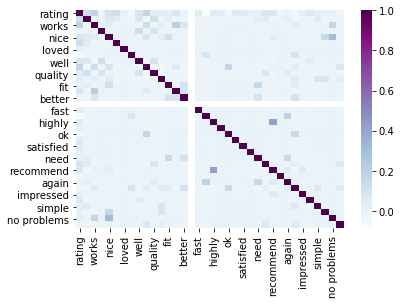

In [4]:
sns.heatmap(reviews.corr(), cmap="BuPu")
reviews.corr()


In [5]:
 
data = reviews[keywords]
target = reviews['rating'] 


In [6]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)


# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 341
